In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

In [220]:
data = pd.read_csv('Spectrum_ground_truth_v1')

In [221]:
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [222]:
data = data.loc[data['350'].notnull(), :]

In [223]:
trait = 'SLA'

In [224]:
df = data.loc[data[trait].notnull(), :]

In [225]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
4,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
6,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.063127,0.062848,0.062419,0.061859,0.061757,0.061780,0.061694,0.061778,0.061602,0.061258
18,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.047240,0.047197,0.047097,0.047076,0.047109,0.047000,0.046865,0.046916,0.046800,0.046609
153,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.051336,0.051330,0.050878,0.050832,0.050811,0.050747,0.050927,0.050916,0.050690,0.050420
155,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.037923,0.038071,0.038045,0.038280,0.038452,0.038060,0.037492,0.037041,0.036808,0.036783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.047897,0.047782,0.047766,0.047935,0.047922,0.047873,0.047877,0.047550,0.047167,0.046907
2388,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.044129,0.043988,0.043800,0.043439,0.043239,0.043229,0.043340,0.043594,0.043514,0.043296
2389,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.053184,0.053091,0.052986,0.052769,0.052454,0.052359,0.052218,0.052067,0.051874,0.051651
2390,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.054906,0.054912,0.054887,0.054571,0.054200,0.053860,0.053767,0.053851,0.053684,0.053643


In [226]:
#Identify x 
position_350 = df.columns.get_loc('350')
position_2500 = df.columns.get_loc('2500') + 1 
X = df.iloc[:, position_350 : position_2500]

In [227]:
#Extracting the column names
col_names=X.columns

In [228]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [229]:
#drop first 100 column
X = X.drop(X.columns[0:100], axis=1)

In [230]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [231]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [232]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(df['PLOT ID']))

In [233]:
first_columns = df[['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'genotype', 'note', 'Calibration', 'ASD']]



In [234]:
#merging GEM gt
df=pd.merge(first_columns, X, how='outer')

In [235]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.044459,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336
1,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.076053,0.073855,0.071431,0.069493,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285
2,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.054565,0.053394,0.051987,0.050874,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629
3,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.057561,0.056364,0.055173,0.053919,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402
4,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.045437,0.044465,0.042950,0.041319,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.057304,0.055618,0.054255,0.052254,0.051160,0.050028,0.048961,0.048075,0.047927,0.046863
266,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.053143,0.051391,0.050009,0.048248,0.047225,0.045835,0.045225,0.044159,0.043247,0.043314
267,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.065332,0.063273,0.061116,0.059545,0.057473,0.055754,0.054691,0.053247,0.052504,0.051653
268,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.065816,0.063957,0.062021,0.060217,0.058768,0.057140,0.056466,0.055024,0.054189,0.053637


In [236]:
brooke = pd.read_csv('Brooke_gt_merged')

In [237]:
brooke.rename(columns={'Dry weight': 'Dry_weight'},inplace=True)

In [238]:
data_all_v1 = pd.concat([df, brooke])

In [239]:
data_all.reset_index(inplace=True, drop=True)

In [240]:
## Adding 18-20 data
M1820 = pd.read_csv('Maize18-20.csv' , dtype= {'Year' : 'category' , 'Genotpye' : 'object' , 'Conditions' : 'category' , 'crop' : 'category',
                                              'pheno' : 'category' , 'StalkLodgingPct' : 'object'})

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2166,2182,2188,2189) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [241]:
M1820.rename(columns = {'PlotID' : 'PLOT ID', 'Chlorophyll' : 'CHL', 'Leaf_Dry_Weight' : 'Dry_weight', 
                       'Leaf_Fresh_Weight': 'Fresh_weight', 'Leaf_Area' : 'Leaf_area', 'Specific_Leaf_Area': 'SLA'
                       },inplace=True)

# DIGER TARAFTA CALISAN KOD#

In [242]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]

In [243]:
y= M1820_trait.loc[M1820_trait['Year'] != '2020', trait]

In [244]:
y

0       167.916076
1       171.016442
2       145.803571
3       184.064987
4       188.950042
           ...    
1205    199.742152
1206    182.245562
1207    160.325000
1208    153.299301
1209    190.578864
Name: SLA, Length: 1210, dtype: float64

In [245]:
# selecting the hyperspectral Data
X_total = M1820_trait.loc[M1820_trait.Year != '2020']
X_total =  X_total.iloc[: ,11:2162]


In [246]:
#remove the first 100
X_total.drop(columns = X_total.columns[0:100], inplace = True) 

In [247]:
sav_X = savgol_filter(X_total, window_length=5 , polyorder = 2)
sav_X.shape
df = pd.DataFrame(sav_X)
df.shape

(1210, 2051)

In [248]:
#Identify x 
position_350 = M1820.columns.get_loc('350')
position_2500 = M1820.columns.get_loc('2500') + 1 
X = M1820.iloc[:, position_350 : position_2500]

In [249]:
## Downsampling every 5 nm
column_filter = np.arange(0,2050,5)  ## creating an index for column filtering
X= df.iloc[:, column_filter] # selecting the filtered columns 

In [250]:
X

,0,5,10,15,20,25,30,35,40,45,...,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045
0,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,0.056853,0.057798,...,0.056643,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443
1,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,0.046982,0.047486,...,0.047450,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527
2,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,0.062564,0.063002,...,0.055928,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189
3,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,0.062985,0.063494,...,0.063730,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928
4,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,0.055343,0.056322,...,0.053332,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,0.061703,...,0.064024,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260
1206,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,0.061822,...,0.055437,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509
1207,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,0.058673,...,0.054134,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473
1208,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,0.066407,...,0.066928,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710


In [251]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.4) 

In [252]:
### calculate RMSE
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

PLSRegression(n_components=20)

In [253]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

17.652311451310304

In [254]:
y_pred = pls.predict(X_test)

<AxesSubplot:xlabel='SLA', ylabel='Predicted LWC values'>

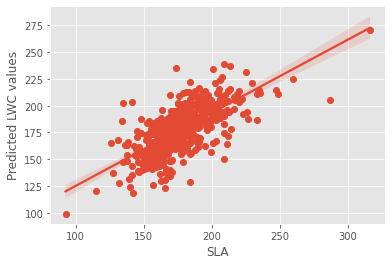

In [255]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted LWC values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)

In [256]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.5104725870233217 8.741980661221995e-77


# diger tarafta calisan kod #

In [257]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]
M1820_trait = M1820_trait.loc[M1820_trait['Year'] != '2020', :]

In [258]:
#Identify x 
position_350 = M1820_trait.columns.get_loc('350')
position_2500 = M1820_trait.columns.get_loc('2500') + 1 
X = M1820_trait.iloc[:, position_350 : position_2500]


In [259]:
X

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,...,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
1,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,...,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503
2,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,...,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704
3,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,...,0.051306,0.051264,0.051125,0.051135,0.050983,0.050531,0.050280,0.050144,0.049989,0.049945
4,0.096988,0.106913,0.099666,0.085338,0.086283,0.086462,0.085748,0.084381,0.081730,0.073750,...,0.041867,0.042194,0.042013,0.041689,0.041549,0.040944,0.040854,0.041708,0.041670,0.041102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.018462,0.083275,0.100908,0.083378,0.110900,0.103183,0.094069,0.097444,0.099497,0.063413,...,0.049948,0.050165,0.050022,0.049576,0.049323,0.048908,0.048707,0.048788,0.048810,0.048986
1206,0.071978,0.093741,0.100782,0.093073,0.097581,0.097194,0.095029,0.092184,0.086068,0.069680,...,0.044395,0.044416,0.044305,0.044557,0.044560,0.044199,0.043961,0.043740,0.043638,0.043543
1207,0.129601,0.091998,0.087160,0.107831,0.105226,0.083397,0.081368,0.089573,0.062108,0.081436,...,0.042617,0.042558,0.042421,0.042585,0.042525,0.042152,0.041987,0.042005,0.041780,0.041325
1208,0.097422,0.024980,0.045219,0.109365,0.110137,0.075801,0.057043,0.070797,0.095715,0.079927,...,0.052669,0.052493,0.052295,0.052027,0.051711,0.051372,0.051050,0.050479,0.050353,0.050778


In [260]:
#drop first 100 column
X.drop(columns = X.columns[0:100], inplace=True)


In [261]:
#Extracting the column names
col_names=X.columns

In [262]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [263]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [264]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [265]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(M1820_trait['PLOT ID']))

In [266]:
X

,PLOT ID,450,455,460,465,470,475,480,485,490,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,0.056853,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,0.046982,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,0.062564,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,0.062985,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,0.055343,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [267]:
trait_column = M1820_trait[['PLOT ID', trait]]

In [268]:
#merging M1820 again
M1820=pd.merge(trait_column, X, how='outer')

In [269]:
M1820

,PLOT ID,SLA,450,455,460,465,470,475,480,485,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,167.916076,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,171.016442,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,145.803571,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,184.064987,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,188.950042,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,199.742152,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,182.245562,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,160.325000,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,153.299301,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [270]:
data_all_v2 = pd.concat([data_all_v1, M1820])

In [271]:
data_all_v2

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,1005,7.73,366.0,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,NaN,NaN,NaN,NaN
1,1007,12.37,598.0,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285,NaN,NaN,NaN,NaN
2,1019,15.13,535.0,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629,NaN,NaN,NaN,NaN
3,1154,12.38,451.0,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402,NaN,NaN,NaN,NaN
4,1156,15.98,621.0,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,NaN,NaN,199.742152,NaN,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,NaN,NaN,182.245562,NaN,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,NaN,NaN,160.325000,NaN,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,NaN,NaN,153.299301,NaN,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN


In [272]:
#chhosing the data (SAM, HIPS, 1820 and BGEM combination or only BGEM)
data_all = data_all_v2

In [273]:
data_all = data_all.loc[data_all[trait].notnull(), :]

In [274]:
data_all

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,1005,7.73,366.0,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,NaN,NaN,NaN,NaN
1,1007,12.37,598.0,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285,NaN,NaN,NaN,NaN
2,1019,15.13,535.0,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629,NaN,NaN,NaN,NaN
3,1154,12.38,451.0,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402,NaN,NaN,NaN,NaN
4,1156,15.98,621.0,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,NaN,NaN,199.742152,NaN,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,NaN,NaN,182.245562,NaN,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,NaN,NaN,160.325000,NaN,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,NaN,NaN,153.299301,NaN,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN


In [275]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.50 * IQR)
 upper_range = Q3 + (1.50 * IQR)
 return lower_range,upper_range

In [276]:
outlier_treatment(data_all[trait])

(118.40770132093458, 240.1727424544154)

In [277]:
lowerbound,upperbound = outlier_treatment(data_all[trait])

In [278]:
rm_index =data_all[(data_all[trait] < lowerbound) | (data_all[trait] > upperbound)].index
rm_index.size

34

In [279]:
data_all.drop(rm_index, axis=0 ,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [280]:
#df= data_all.loc[data_all[trait].notnull(),:]
y = data_all.loc[:, trait]

In [281]:
y

0       210.344828
1       187.460815
2       179.530201
3       146.905537
4       171.546961
           ...    
1205    199.742152
1206    182.245562
1207    160.325000
1208    153.299301
1209    190.578864
Name: SLA, Length: 1676, dtype: float64

In [282]:
#Scale the y
#y= scale(y)

In [283]:
position_450 = data_all.columns.get_loc('450')
position_2500 = data_all.columns.get_loc('2500') + 1 
X = data_all.iloc[:, position_450 : position_2500]

In [284]:
X

,450,455,460,465,470,475,480,485,490,495,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,0.035496,0.036285,0.036419,0.036677,0.036848,0.036885,0.036963,0.037299,0.038144,0.039155,...,0.044459,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336
1,0.051669,0.053216,0.053859,0.053814,0.054149,0.054459,0.054598,0.055209,0.056733,0.058923,...,0.076053,0.073855,0.071431,0.069493,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285
2,0.049999,0.050574,0.050352,0.050312,0.050332,0.050178,0.050253,0.050561,0.050808,0.051360,...,0.054565,0.053394,0.051987,0.050874,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629
3,0.053957,0.055385,0.055300,0.055314,0.055493,0.055750,0.055841,0.056223,0.057060,0.058567,...,0.057561,0.056364,0.055173,0.053919,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402
4,0.039537,0.040387,0.040368,0.040519,0.041065,0.040819,0.040880,0.041399,0.042105,0.043318,...,0.045437,0.044465,0.042950,0.041319,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,0.061703,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,0.061822,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,0.058673,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,0.066407,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [285]:
#define the cv
cv = RepeatedKFold(n_splits=10, n_repeats=5)
mse = []

In [286]:
#Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 60):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(np.sqrt(score))
    n_comb = mse.index(min(mse)) +1

Text(0.5, 1.0, 'SLA')

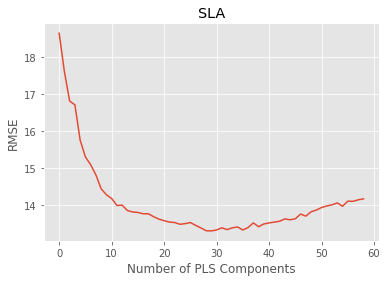

In [287]:
#plot test MSE vs. number of components
plt.style.use('ggplot')
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title(trait)

In [288]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.4) 

In [289]:
### calculate RMSE
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

PLSRegression(n_components=20)

In [290]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

13.403095345687204

In [291]:
y_pred = pls.predict(X_test)

<AxesSubplot:xlabel='SLA', ylabel='Predicted SLA values'>

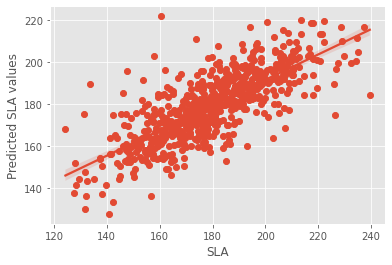

In [292]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted' + ' ' + trait + ' ' + 'values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)
#plt.text(x=68 , y=78 , s='r$^2$ = 0.68'  )

In [293]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.5892282977266023 2.2534402973895816e-131


In [294]:
ytdf= pd.DataFrame(y_test)

In [295]:
ytdf.reset_index(inplace=True)

In [296]:
ypdf = pd.DataFrame(y_pred)

In [297]:
ypdf.reset_index(inplace=True)

In [298]:
merged =pd.concat([ytdf, ypdf], axis=1)

In [299]:
diff = merged[trait]-merged[0]

In [300]:
merged.insert(4, 'diff', diff)

In [301]:
merged.sort_values(by='diff')[:50]

,index,SLA,index,0,diff
581,173,160.613027,581,221.797350,-61.184323
3,667,133.739877,3,189.498211,-55.758333
379,141,147.715909,379,195.604863,-47.888954
442,67,157.918367,442,203.003703,-45.085335
555,431,131.248019,555,175.512615,-44.264596
398,465,124.347826,398,168.446294,-44.098468
532,57,145.970149,532,185.404496,-39.434346
96,80,153.811659,96,191.478678,-37.667019
220,98,173.591743,220,210.848036,-37.256293
331,319,162.152838,331,196.263192,-34.110353


In [302]:
M1820

,PLOT ID,SLA,450,455,460,465,470,475,480,485,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,167.916076,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,171.016442,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,145.803571,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,184.064987,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,188.950042,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,199.742152,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,182.245562,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,160.325000,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,153.299301,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [303]:
data_all_v1

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,1005,7.73,366.0,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,NaN,NaN,NaN,NaN
1,1007,12.37,598.0,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285,NaN,NaN,NaN,NaN
2,1019,15.13,535.0,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629,NaN,NaN,NaN,NaN
3,1154,12.38,451.0,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402,NaN,NaN,NaN,NaN
4,1156,15.98,621.0,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,6137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,279.0,2.0,F42 x Mo17,HIPS
280,6137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,280.0,2.0,F42 x Mo17,HIPS
281,6255,4.39,248.8,NaN,NaN,114.566667,87.6,135.7,120.4,NaN,...,0.134043,0.131491,0.129041,0.126676,0.124981,0.123236,281.0,2.0,LH123HT x 3IIH6,HIPS
282,6261,5.67,325.6,NaN,NaN,444.900000,304.2,525.9,504.6,NaN,...,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403,282.0,2.0,B14A x Mo17,HIPS


In [304]:
data_all_v2

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,1005,7.73,366.0,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,NaN,NaN,NaN,NaN
1,1007,12.37,598.0,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285,NaN,NaN,NaN,NaN
2,1019,15.13,535.0,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629,NaN,NaN,NaN,NaN
3,1154,12.38,451.0,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402,NaN,NaN,NaN,NaN
4,1156,15.98,621.0,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,NaN,NaN,199.742152,NaN,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,NaN,NaN,182.245562,NaN,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,NaN,NaN,160.325000,NaN,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,NaN,NaN,153.299301,NaN,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN
